<div style="background-color: #f8f9fa; padding: 20px;">
    <h1 style="color: #007bff; font-size: 32px; margin-bottom: 10px;">Neural Network Project</h1>
    <div style="color: #495057; font-size: 14px; margin-bottom: 5px;">by</div>
    <div style="color: #343a40; font-size: 20px; margin-bottom: 15px;">Prashant Patil</div>
    <div style="color: #6c757d; font-size: 14px;">AIML Online October 2023-A Batch</div>
    <div style="color: #6c757d; font-size: 14px;">9 Jun 2024</div>
</div>

# Table of Contents

### Part A
* Import libraries
* Data Reading / understanding / Data cleansing
  - Check null values
  - Delete duplicates
  - Check outliers (Conditional check handling outliers with caution)
  - check distribution of target variable
  - Data analysis observations with boxplot and describe summary
* Data preprocessing
  - Split data into X, y
  - Split data into train and test.
  - Normlize X data
  - Convert Y data into categorical (binary matrix)
* Model building
  - Define Goal statement
  - Define reusable functions
    create & Print model - should build based on parameters passed to function including laer count, neuron count
    evaluate & Print model performance - This should print loss, accuracy, classification report and confusion metrics
    print accuracy/loss
  - Build neural network ModelA1 with basic architecture. Train the model and check accuracy  - 
  - Build new model ModelA2 with regularization techniques with little complex architecture. Train and avaluate
  - Train ModelA1 on SMOTE data. Evaluate
* Plot Loss/Accuracy
  - Display loss/accuracy for training and validation both
* Observations

### Part B
* Data Reading / understanding
  - Read data from h5 file and extract training, testing and validation data
* Data preprocessing  
  - Initialize train, validation and testing data variables.
  - Normlize X data
  - Convert Y data into categorical (binary matrix)
  - View images and labels
* Model building
  - Define Goal statement  
  - Build neural network ModelB1. Print and check design as per expectations
  - Train the model and check accuracy
  - Check actual images and predictions
  
* Plot Loss/Accuracy
  - Display loss/accuracy for training and validation both
  - Observations
   

# Part A

#### Goal Statement

We have been provided signal quality labels data along with various parameters. We need to build NN model to predict signal quality for various parameter combinations with high accuracy, recall and precision.

## Q.1 Data import and Understanding

### Q.1.A. Read the ‘Signals.csv’ as DataFrame and import required libraries

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input, BatchNormalization, LeakyReLU
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.models import Model
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import h5py
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [56]:
# from google.colab import drive
# # Mount Google Drive
# drive.mount('/content/drive')

In [57]:
# Read the CSV file from Google Drive
# df = pd.read_csv('/content/drive/MyDrive/Colab/Signal.csv')
df = pd.read_csv('Signal.csv')
print('Shape: ',df.shape)
print('Top 5 records: ')
df.head()

Shape:  (1599, 12)
Top 5 records: 


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q.1.B. Check for missing values and print percentage for each attribute

In [58]:
# Check for missing values and print percentage for each attribute
missing_values = df.isnull().sum()
total_values = len(df)
missing_percentages = missing_values / total_values * 100

for attribute, percentage in zip(missing_values.index, missing_percentages):
  print(f"Attribute: {attribute}, Missing Values: {percentage:.2f}%")


Attribute: Parameter 1, Missing Values: 0.00%
Attribute: Parameter 2, Missing Values: 0.00%
Attribute: Parameter 3, Missing Values: 0.00%
Attribute: Parameter 4, Missing Values: 0.00%
Attribute: Parameter 5, Missing Values: 0.00%
Attribute: Parameter 6, Missing Values: 0.00%
Attribute: Parameter 7, Missing Values: 0.00%
Attribute: Parameter 8, Missing Values: 0.00%
Attribute: Parameter 9, Missing Values: 0.00%
Attribute: Parameter 10, Missing Values: 0.00%
Attribute: Parameter 11, Missing Values: 0.00%
Attribute: Signal_Strength, Missing Values: 0.00%


No missing values found in dataset.

### Q.1.C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [59]:
print(df.shape)
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
#Lets drop duplicate records while keeping first
df.drop_duplicates(keep='first', inplace=True)
#Now lets verify if duplicates have been removed
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows after handling duplicates: {len(duplicate_rows)}")
print(df.shape)

(1599, 12)
Number of duplicate rows: 240
Number of duplicate rows after handling duplicates: 0
(1359, 12)


We have ensured to keep 1st record while deleting duplicates.

### Q.1.D. Visualise distribution of the target variable

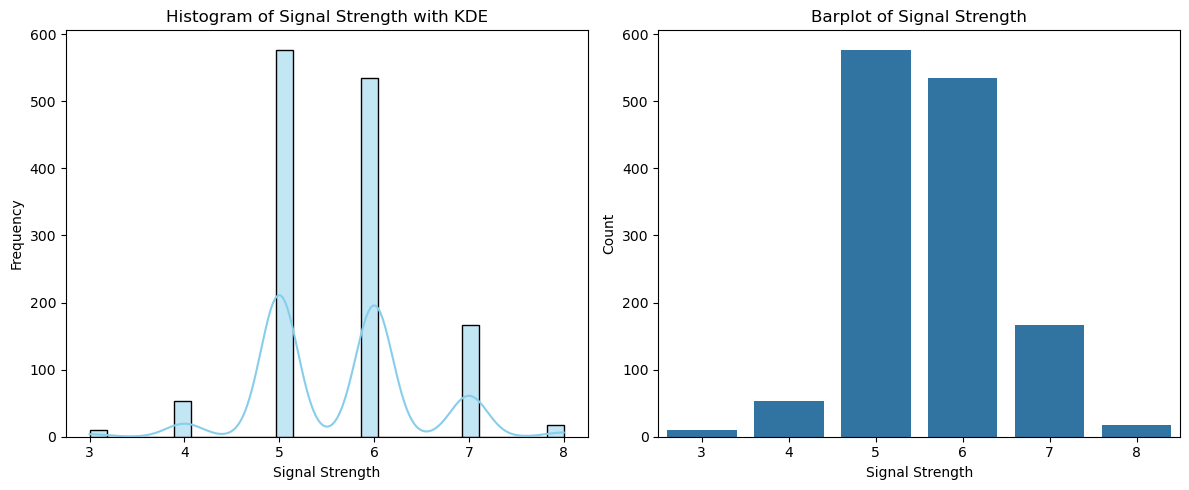

In [60]:
target_variable = df['Signal_Strength']

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Histplot with KDE
plt.subplot(1, 2, 1)
sns.histplot(target_variable, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.title('Histogram of Signal Strength with KDE')

# Subplot 2: Barplot of unique Signal Strength values
plt.subplot(1, 2, 2)
value_counts = target_variable.value_counts().reset_index()
value_counts.columns = ['Signal_Strength', 'Count']
sns.barplot(x='Signal_Strength', y='Count', data=value_counts)
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.title('Barplot of Signal Strength')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

__Observations__

It can be infered that signal strength data is highly imbalanced.

Data is normally distributed across 5 and 6 value.

### Q.1.E. Share insights from the initial data analysis

**Distribution of Target variable(Signal strength)**

* The signal strength data appears to follow a normal distribution.
* Most of the readings recorded signal strengths of 5 and 6.
* Comparatively, very few records have signal strengths of 3, 4, 7, and 8.
* This indicates that many readings reflect medium signal strength, neither very poor nor excellent.



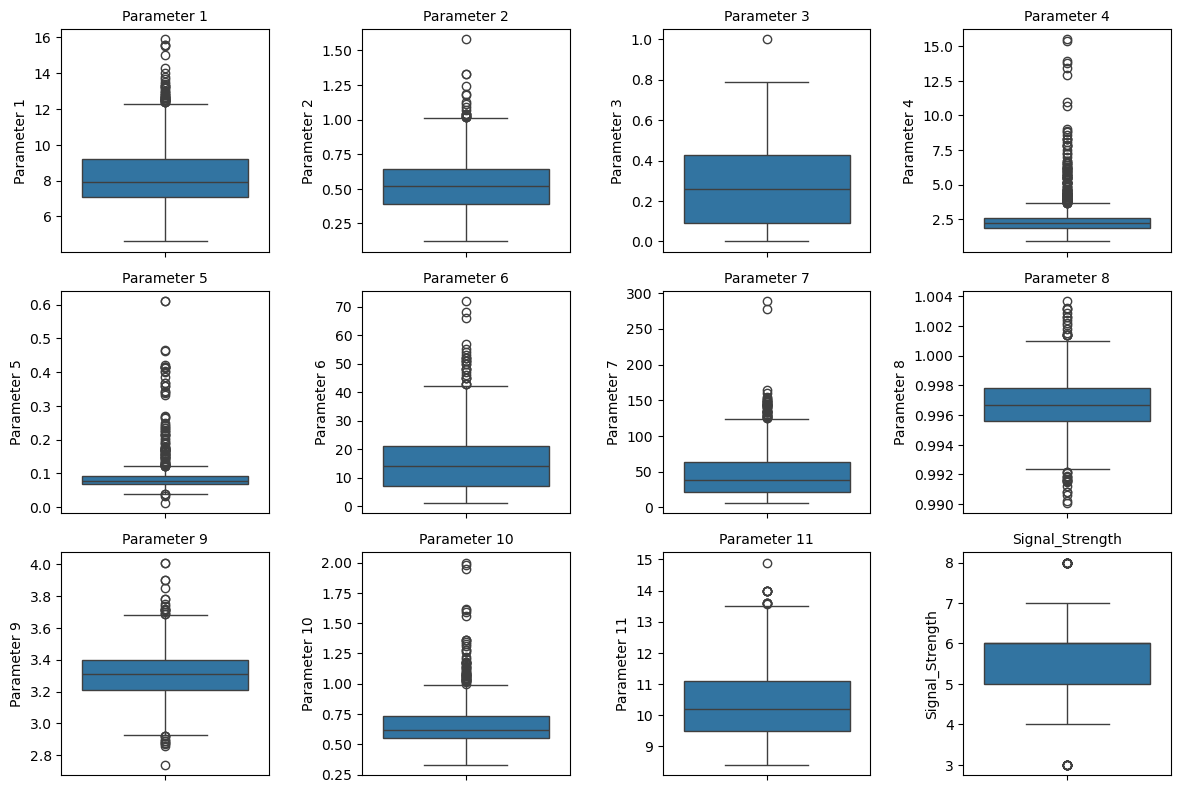

In [61]:
# Lets check distribution of variables using boxplots
fig, axes = plt.subplots(3, 4, figsize=(12, 8))  # Adjusted figsize to make boxplots smaller

# Plot boxplots
for i in range(len(df.columns)):
    sns.boxplot(y=df.iloc[:, i], ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(df.columns[i], fontsize=10)  # Adjusted title font size

# Adjust layout for better spacing
plt.tight_layout()

In [62]:
#Lets analyze summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


**Observations on Data**

*   Boxplots shows that there are many outliers in almost all variables.
*   For most of the variables data is left skewed.
*   Parameters like 8 and 9 show very low variance, indicating consistent measurements.
*   Variability: Parameters like 6 and 7 have high variance, indicating a wide range of values, which could potentially influence the model's performance.
*   Outliers: Some parameters have significant outliers (e.g., Parameters 1, 4, 7), which might need special attention during data preprocessing.
*   Target Variable: The Signal_Strength has a consistent range with most values around the median, which should help in creating a stable model.

## Q.2. Data preprocessing

__Outlier treatment__

We attempted to remove extreme outliers but decided against using this approach for now due to the risk of losing valuable data, particularly for less frequent target variable categories. ALso, model performance didnt improved significantly when tried with treated data.

In [63]:
#Outliers handling : Lets try with outlier handling

# df = df.copy()  # Create a copy to avoid modifying the original dataframe
# target_column = 'Signal_Strength'

# # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column except the target column
# Q1 = df.drop(columns=target_column).quantile(0.5)
# Q3 = df.drop(columns=target_column).quantile(0.95)

# # Calculate IQR for each column
# IQR = Q3 - Q1

# # Define lower and upper bounds for each column
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# for column in df.drop(columns=target_column).columns:
#     df[column] = df[column].clip(lower_bound[column], upper_bound[column])


### Q.2.A. Split the data into X & Y.

In [64]:
# Separate features and target
X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']
print(X.shape)
print(y.shape)

(1359, 11)
(1359,)


### Q.2.B. Split the data into train & test with 70:30 proportion

In [65]:

# Split the data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(951, 11)
(408, 11)
(951,)
(408,)


### Q.2.C. Print shape of all the 4 variables and verify if train and test data is in sync

In [66]:
# Print shape of all the 4 variables and verify if train and test data is in sync

print('X_train shape:', X_train1.shape)
print('y_train shape:', y_train1.shape)
print('X_test shape:', X_test1.shape)
print('y_test shape:', y_test1.shape)

# Verify if train and test data is in sync
print('Total X data points:', len(X))
print('Total y data points:', len(y))
print('Training + Testing X data points:', len(X_train1) + len(X_test1))
print('Training + Testing y data points:', len(y_train1) + len(y_test1))

X_train shape: (951, 11)
y_train shape: (951,)
X_test shape: (408, 11)
y_test shape: (408,)
Total X data points: 1359
Total y data points: 1359
Training + Testing X data points: 1359
Training + Testing y data points: 1359


Training and testing data is in sync as feature list is same 11 for both. 
Also rows in X_train and X_test when added are same with rows in X.

### Q.2.D. Normalise the train and test data with appropriate method

In [67]:
# Lets narmalize X_train and X_test data using minmax scaling
# scaler = StandardScaler()
scaler = MinMaxScaler()
# Fit the scaler to the training data
scaler.fit(X_train1)

# Transform the training and testing data
X_train_normalized1 = scaler.transform(X_train1)
X_test_normalized1 = scaler.transform(X_test1)


### Q.2.E. Transform Labels into format acceptable by Neural Network

In [75]:
# Convert labels to one-hot encoded format. Target variable to be converted into binary matrix before passing to neural network
unique_values_train = np.unique(y_train1)
unique_values_count = num_classes = len(np.unique(y_train1))
print(unique_values_count, "unique values in y_train1:", unique_values_train)

y_train_categorical1 = to_categorical(y_train1, num_classes=7)
y_test_categorical1 = to_categorical(y_test1,  num_classes=7)
print(y_train_categorical1.shape)

6 unique values in y_train1: [3 4 5 6 7 8]


IndexError: index 6 is out of bounds for axis 1 with size 6

In [76]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Example input arrays (adjust these arrays if necessary)
y_train1 = np.array([0, 1, 2, 3, 4, 5])  # Should contain values in the range [0, 5]
y_test1 = np.array([0, 1, 2, 3, 4, 5])

# Verify unique values
unique_train = np.unique(y_train1)
unique_test = np.unique(y_test1)

print("Unique values in y_train1:", unique_train)
print("Unique values in y_test1:", unique_test)

# Ensure all values are within the range [0, 5]
assert np.all(unique_train >= 0) and np.all(unique_train < 6), "y_train1 contains values out of range [0, 5]"
assert np.all(unique_test >= 0) and np.all(unique_test < 6), "y_test1 contains values out of range [0, 5]"

# Convert to categorical with 6 classes
num_classes = 6
y_train_categorical1 = to_categorical(y_train1, num_classes=num_classes)
y_test_categorical1 = to_categorical(y_test1, num_classes=num_classes)

print("y_train_categorical1 shape:", y_train_categorical1.shape)
print("y_test_categorical1 shape:", y_test_categorical1.shape)


Unique values in y_train1: [0 1 2 3 4 5]
Unique values in y_test1: [0 1 2 3 4 5]
y_train_categorical1 shape: (6, 6)
y_test_categorical1 shape: (6, 6)


## Q.3. Model Training & Evaluation using Neural Network

### Common functions to be used for model building, evaluation printing, plotting charts

In [ ]:
#This function is used to calculate and print the output of given model
def evaluate_model(model_Local, X_test_Local, y_test_Local):
    # Evaluate the model on the test data
    print("************Model performance on test data************")
    test_lossL, test_accuracyL = model_Local.evaluate(X_test_Local, y_test_Local)
    print("Test Loss:", test_lossL)
    print("Test Accuracy:", test_accuracyL)

    # Predict the labels for the test set
    y_test_pred_Local = model_Local.predict(X_test_Local)

    # Convert one-hot encoded predictions and labels to class labels
    y_test_pred_classes_Local = np.argmax(y_test_pred_Local, axis=1)
    y_test_true_classes_Local = np.argmax(y_test_Local, axis=1)

    # Calculate and print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test_true_classes_Local, y_test_pred_classes_Local))

    # Calculate and print the confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_true_classes_Local, y_test_pred_classes_Local))

In [ ]:
#This function is to create model for given inputs and combinations. This will help to try multiple combinations
def Create_Model(input_activation, output_activation, input_shape, output_shape, kernel_initializer, learning_rate, dropout_rate=None, batch_norm=False, layers=None, neurons=None, optimizer=None,loss=None):
    M = Sequential()
    
    # Input layer    
    if input_activation == 'leakyrelu':
        M.add(Input(shape=(input_shape,)))  # Input layer specifying the shape of the input
        M.add(Dense(neurons[0], kernel_initializer=kernel_initializer))
        # M.add(Dense(neurons[0], input_dim=input_shape, kernel_initializer=kernel_initializer))
        M.add(LeakyReLU())
    else:
        M.add(Input(shape=(input_shape,)))
        M.add(Dense(neurons[0], activation=input_activation, kernel_initializer=kernel_initializer))
        # M.add(Dense(neurons[0], input_dim=input_shape, activation=input_activation, kernel_initializer=kernel_initializer))
    if batch_norm:
        M.add(BatchNormalization())
    if dropout_rate is not None:
        M.add(Dropout(dropout_rate))

    # Hidden layers
    for i in range(1, layers):        
        if input_activation == 'leakyrelu':
            M.add(Dense(neurons[i], kernel_initializer='he_uniform'))
            M.add(LeakyReLU())
        else:
            M.add(Dense(neurons[i], activation=input_activation, kernel_initializer='he_uniform'))
        if batch_norm:
            M.add(BatchNormalization())
        if dropout_rate is not None:
            M.add(Dropout(dropout_rate))

    # Output layer
    M.add(Dense(output_shape, activation=output_activation))  # Output layer with softmax activation
    
    if optimizer is None:
        optimizer = Adam(learning_rate=learning_rate)
    if loss is None:
        loss = 'categorical_crossentropy'
    # optimizer = Adam(learning_rate=learning_rate)
    M.summary()    
    M.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return M


In [ ]:
#This function is to define loss and accuracy charts for given evaluated history of a model
def PlotLossAccuracy(historyL, modelName):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training and validation loss
    axs[0].plot(historyL.history['loss'], label='Training Loss')
    axs[0].plot(historyL.history['val_loss'], label='Validation Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_title('Training and Validation Loss :' + modelName)
    
    # Plot training and validation accuracy
    axs[1].plot(historyL.history['accuracy'], label='Training Accuracy')
    axs[1].plot(historyL.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].set_title('Training and Validation Accuracy :' + modelName)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

### Q.3.A. Design a Neural Network to train a classifier.

##### Model A1 - Basic model without regularization
activation=relu/softmax
3 layers : neurons=[64, 32, 16]
learning_rate=0.001
dropout_rate= NO
batch_norm= False
epochs=100
batch_size=32
Optimizer = Adam

In [74]:
#Let us use very basic neural network without any regularization and parameter tuning

#We will make use of our user defined function to design and build model
modelA1 = Create_Model(input_activation='relu', output_activation='softmax',input_shape= X_train_normalized1.shape[1], output_shape= 6 ,kernel_initializer='he_uniform', learning_rate=0.001, dropout_rate=None, batch_norm=False, layers=3, neurons=[64, 32, 16])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,478 (13.59 KB)

 Trainable params: 3,478 (13.59 KB)

 Non-trainable params: 0 (0.00 B)

### Q.3.B. Train the classifier using previously designed Architecture

In [ ]:
# Train the basic ModelA1 model
# Compile the model
modelA1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='accuracy', patience=6, restore_best_weights=True)
historyA1 = modelA1.fit(X_train_normalized1, y_train_categorical1, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

In [20]:
#Lets call evaluate function to print the output for given (ModelA4) model
evaluate_model(modelA1, X_test_normalized1, y_test_categorical1)

************Model performance on test data************
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 0.9860 
Test Loss: 0.9756624698638916
Test Accuracy: 0.595588207244873
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.68      0.65      0.66       173
           6       0.54      0.70      0.61       161
           7       0.54      0.38      0.45        50
           8       0.00      0.00      0.00         5

    accuracy                           0.60       408
   macro avg       0.29      0.29      0.29       408
weighted avg       0.57      0.60      0.58       408


Confusion Matrix:
[[  0   0   2   1   0   0]
 [  0   0  11   5   0   0]
 [  0   0 112  59   2   0]
 [  0   0  38 112  11   0]
 [  0   0   2  29  19   0]
 [  0   0   0   2   3   0]]


__Obervations__
- Model seems to be performing average with accuracy of 60+ in training and validation set. 
- Testing accuracy is 57%. We will check for improvements in further models
- Also, there is point of concern that model is unable to predict for classes 3 and 8. This might be due to imbalance in target classes.

### Q.3.C. Plot 2 separate visuals

### Q.3.C.i. Plot 2 separate visuals : Training Loss and Validation Loss

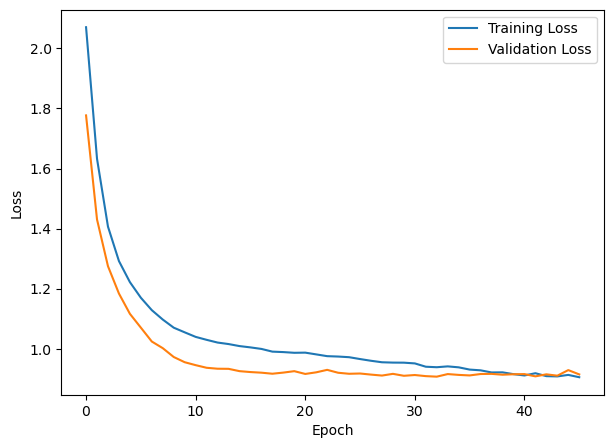

In [21]:
# Visualize the training and validation loss for ModelA1
plt.figure(figsize=(7,5))
plt.plot(historyA1.history['loss'], label='Training Loss')
plt.plot(historyA1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# PlotLossAccuracy(historyA1, 'ModelA1(Basic)')


### Q.3.C.ii. Training Accuracy and Validation Accuracy

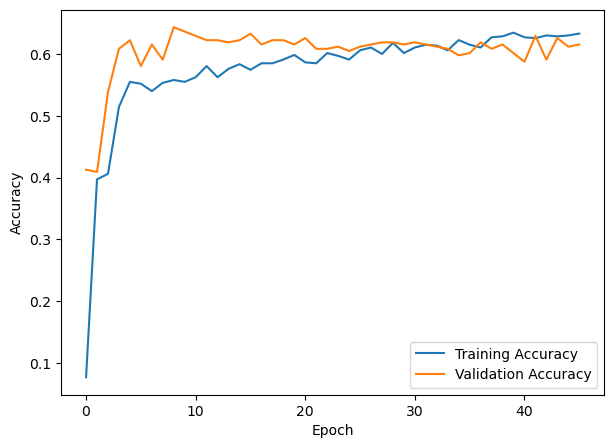

In [22]:
# prompt: plot visual for : Training Accuracy and Validation Accuracy for ModelA1

# Visualize the training and validation accuracy
plt.figure(figsize=(7,5))
plt.plot(historyA1.history['accuracy'], label='Training Accuracy')
plt.plot(historyA1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# PlotLossAccuracy(historyA1, 'ModelA1(Basic)')


__Obervations__

Loss is decresing and accuracy is increasing. Shows that model is learning.

Training and validation accuracy seems to be inline for this model and both are showing average results.

Validation accuracy is slightly better than training accuracy. 

Validation loss is consisitently slightly lesser that training loss.

### Q.3.D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

##### Model A2 - With regularization and enhanced parameters
activation=relu/softmax
4 layers : neurons=[256, 128, 64,32]
learning_rate=0.001
dropout_rate=0.2
batch_norm=True
epochs=100
batch_size=32

In [23]:

modelA2 = Create_Model(input_activation='relu', output_activation='softmax',input_shape= X_train_normalized1.shape[1], output_shape= y_train_categorical1.shape[1] ,kernel_initializer='he_uniform', learning_rate=0.001, dropout_rate=0.2, batch_norm=True, layers=4, neurons=[256, 128, 64,32])
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
historyA2 = modelA2.fit(X_train_normalized1, y_train_categorical1, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping])
evaluate_model(modelA2, X_test_normalized1, y_test_categorical1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,521 (189.54 KB)

 Trainable params: 47,561 (185.79 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.1360 - loss: 2.7385 - val_accuracy: 0.2622 - val_loss: 2.1173
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2448 - loss: 2.2428 - val_accuracy: 0.5210 - val_loss: 1.8677
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3946 - loss: 1.9532 - val_accuracy: 0.5944 - val_loss: 1.7202
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4417 - loss: 1.8162 - val_accuracy: 0.6119 - val_loss: 1.6048
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5147 - loss: 1.6295 - val_accuracy: 0.6154 - val_loss: 1.4899
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5251 - loss: 1.5864 - val_accuracy: 0.6189 - val_loss: 1.3864
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5624 - loss: 1.4362 - val_accuracy: 0.6084 - val_loss: 1.3119
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5383 - loss: 1.5040 - val_accuracy: 0

__Obervations__
- Model A2 also seems to be performing average with accuracy of 60+ in both training and validation set but it is slightly better than basic model. 
- Testing accuracy comparatively lesser 54%.
- Also, there is point of concern that model is unable to predict for classes 3 and 8. This might be due to imbalance in target classes.

##### Model A2 (designed in previous step) with balanced data (SMOTE)

(2424, 11)
(2424,)


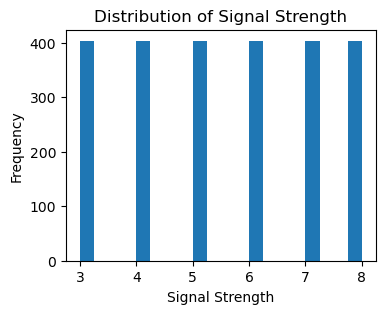

In [24]:
#Lets oversample training data to achieve balance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1_resampled , y_train1_resampled = smote.fit_resample(X_train1,y_train1)

print(X_train1_resampled.shape)
print(y_train1_resampled.shape)

plt.figure(figsize=(4, 3))
plt.hist(y_train1_resampled, bins=20)
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.title('Distribution of Signal Strength')
plt.show()

scaler = MinMaxScaler()
# Fit the scaler to the training data
scaler.fit(X_train1_resampled)
# Transform the training and testing data
X_train_normalized1_sm = scaler.transform(X_train1_resampled)
X_test_normalized1_sm = scaler.transform(X_test1)

y_train_categorical1_sm = to_categorical(y_train1_resampled)
y_test_categorical1_sm = to_categorical(y_test1)

In [25]:
#Lets trin the model on SMOTE data
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
historyA2_sm = modelA2.fit(X_train_normalized1_sm, y_train_categorical1_sm, epochs=100, batch_size=32, validation_split=0.25, callbacks=[early_stopping])
evaluate_model(modelA2,X_test_normalized1_sm, y_test_categorical1_sm)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4136 - loss: 1.7576 - val_accuracy: 0.2145 - val_loss: 2.7526
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6204 - loss: 0.9747 - val_accuracy: 0.2657 - val_loss: 2.2723
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6776 - loss: 0.8238 - val_accuracy: 0.2558 - val_loss: 2.0079
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6863 - loss: 0.7970 - val_accuracy: 0.2591 - val_loss: 2.0366
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6911 - loss: 0.7831 - val_accuracy: 0.2475 - val_loss: 2.0740
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6876 - loss: 0.8037 - val_accuracy: 0.2112 - val_loss: 2.0715
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7150 - loss: 0.7534 - val_accuracy: 0.2607 - val_loss: 1.9136
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7024 - loss: 0.7427 - val_accuracy: 0.2211 - 

__Obervations__
- Model A2 shows good improvement on training data 80+ % when tried on SMOTE data however validation accuracy stays average. 
- Testing accuracy comparatively reduced to 50+%.
- SMOTE doesn't help to get prediction for classes 3 and 8.

##### Model A3 - [With regularization and LeakyRelu]
activation=leakyrelu/softmax
4 layers : neurons=[256, 128, 64,32,16]
learning_rate=0.001
dropout_rate=0.2
batch_norm=True
epochs=100
batch_size=32

In [26]:

modelA3 = Create_Model(input_activation='leakyrelu', output_activation='softmax',input_shape= X_train_normalized1.shape[1], output_shape= y_train_categorical1.shape[1] ,kernel_initializer='he_uniform', learning_rate=0.001, dropout_rate=0.2, batch_norm=True, layers=5, neurons=[256, 128, 64,32, 16])
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
historyA3 = modelA3.fit(X_train_normalized1, y_train_categorical1, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping])
evaluate_model(modelA3, X_test_normalized1, y_test_categorical1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │              

 Total params: 48,969 (191.29 KB)

 Trainable params: 47,977 (187.41 KB)

 Non-trainable params: 992 (3.88 KB)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.1315 - loss: 2.5917 - val_accuracy: 0.0105 - val_loss: 2.2331
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2865 - loss: 2.1403 - val_accuracy: 0.1853 - val_loss: 2.0854
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3559 - loss: 1.9551 - val_accuracy: 0.3531 - val_loss: 1.9427
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4164 - loss: 1.8971 - val_accuracy: 0.5210 - val_loss: 1.8221
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4804 - loss: 1.7832 - val_accuracy: 0.5874 - val_loss: 1.7120
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4864 - loss: 1.7745 - val_accuracy: 0.6154 - val_loss: 1.6069
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5319 - loss: 1.6677 - val_accuracy: 0.6049 - val_loss: 1.5152
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5601 - loss: 1.5554 - val_accuracy: 0

__Obervations__

- Model A3 doesn't shows slight improvement with leakyRLU .
- Testing accuracy comparatively reduced to 60+%.
- No prediction for classes 3, 4 and 8.d 8.

### Q.3.E. Plot visuals as in Q3.C and share insights about difference observed in both the models

##### Model A2 Loss and accuracy

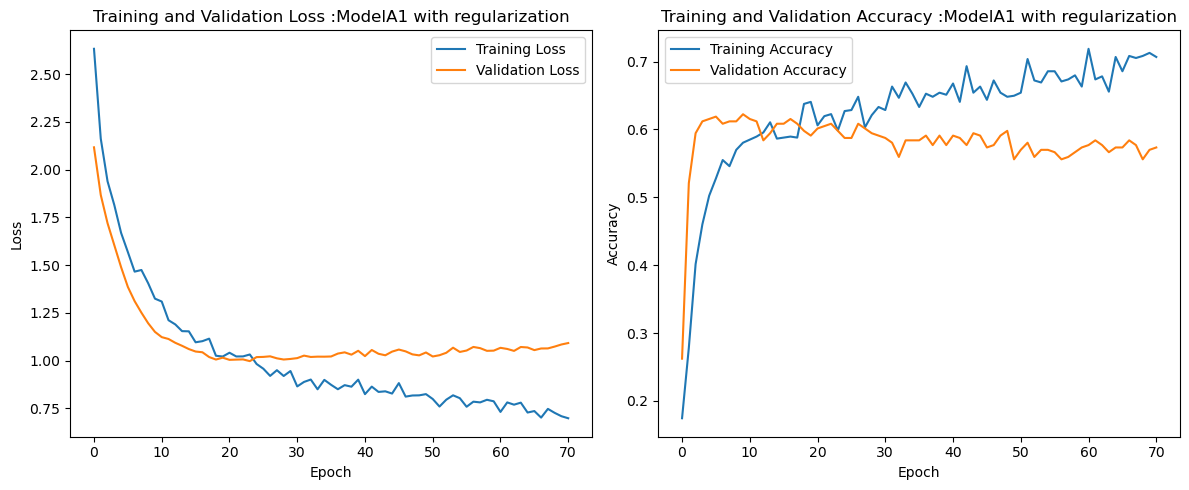

In [27]:
 PlotLossAccuracy(historyA2, 'ModelA1 with regularization')

__Observations__
- ModelA2 performs slightly better than basic ModelA1.
- Validation accuracy starts sropping after certain Epochs.

##### Model A2(SMOTE data) Loss and accuracy 

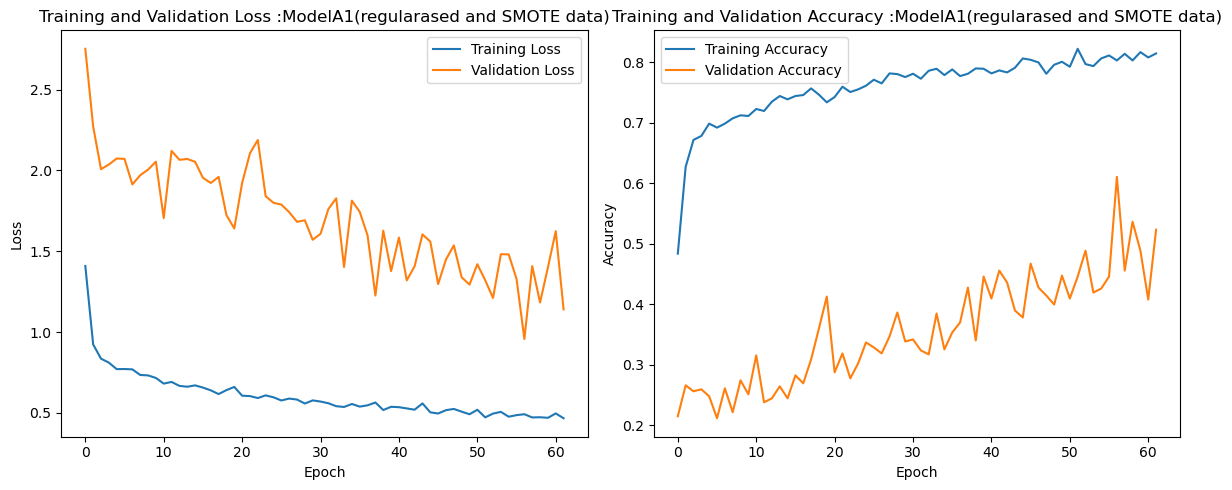

In [28]:
PlotLossAccuracy(historyA2_sm, 'ModelA1(regularased and SMOTE data)')

__Observations__
- ModelA2 with SMOTE data performs well on training but accuracy is very poor for validation data.
- Traing and validation accuracy/loss are not at all in sync. There is huge difference between both results.

##### Model A3 Loss and accuracy

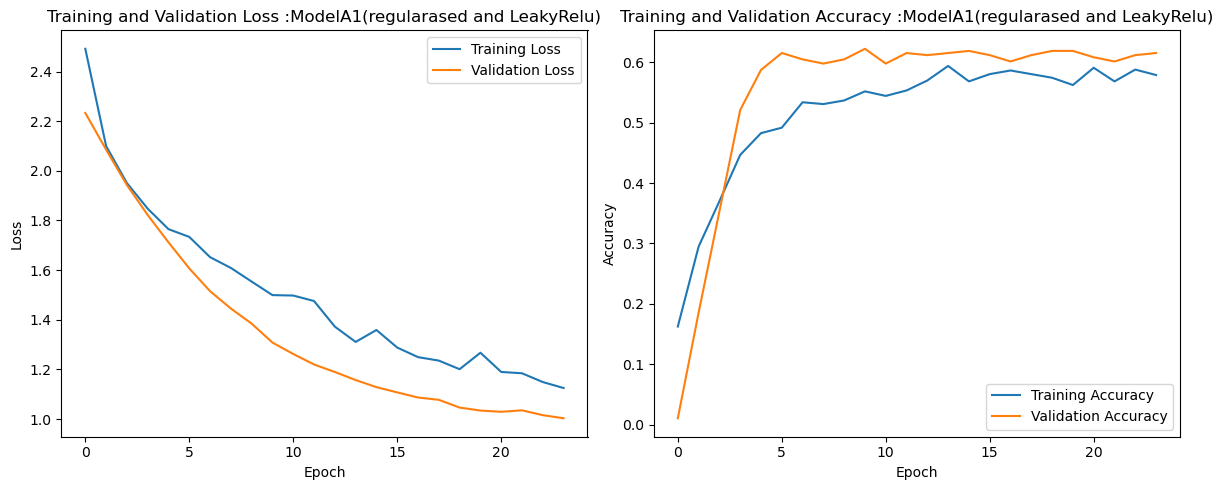

In [29]:
PlotLossAccuracy(historyA3, 'ModelA1(regularased and LeakyRelu)')


__Observations__
- ModelA3 also performs similar to ModelA2.
- It can be seen that loss and accuracy stays similar in both training and validation. This was not the case with basic modelA1.

**Overall observations**

__Model A1 (Original Data):__
We used basic neural network for modelA1. Performance was average with training accuracy and validation accuracy at slightly exceeding 60% and test data accuracy little below 60%. Point of cocern was inability to predict few classes on test data. Classification report states the same. This might be due to imbalance in target variable.

__Model A2 (Regularization and parameter tweaking):__
- We build ModelA2 with little more complexity. We used 4 layers with more neurons. Batch normalizations and regularization used.
- Model accuracy on training and validation data stays moderate. Even testing data also stays moderate.
- Performance improvement is not satisfactory and we might need more data.

__Model A2 (SMOTE Data):__
- We build ModelA2 on SMOTE data.
- Model performs well in terms of accuracy on training data. However, validation and testing accuracy stays low.

__Model A3 (Regularizion with Leaky Relu):__
- We build ModelA3 using LeakyRelu activation function.
- Model results consistent accuracy over training and validation data. 

__Insights:__
- Model 1 provides a baseline for comparison. It demonstrates the performance of the model trained on the original data without any sampling techniques.
- Model 2 (Regularization and parameter tweaking) may show changes in performance metrics due to class imbalance mitigation. However, it's essential to consider potential information loss due to undersampling.
- Model 2 (SMOTE data) is expected to improve performance, particularly for minority classes. It addresses class imbalance by oversampling the minority classes, potentially leading to better classification results overall.
- Model 3 with leakyRelu function also provides average results.

Overall modelA2 & modelA3 are better. However, we see moderate performance across all models and we recommend to have more data to make it perfect.

# Part B

#### Goal Statement

We have been provided image data and labels. We need to build NN model to predict images with high accuracy, recall and precision.

## Q.1.Data Import and Exploration

### Q.1.A. Read the .h5 file and assign to a variable.

In [30]:
# # file_path = '/content/drive/MyDrive/Colab/Autonomous_Vehicles_SVHN_single_grey1.h5'
# file_path = 'Autonomous_Vehicles_SVHN_single_grey1.h5'
# df2 = h5py.File(file_path, 'r')

### Q.1.B.Print all the keys from the .h5 file

In [31]:
print("Keys: %s" % df2.keys())
for key in df2.keys():
        print(key)

NameError: name 'df2' is not defined

### Q.1.C. Split the data into X_train, X_test, Y_train, Y_test

As we can see data is already in split format with respective keys and we just need to fetch data for respective variables

In [ ]:
# Open the HDF5 file and read data into a DataFrame
X_trainB = df2['X_train'][:]
y_trainB = df2['y_train'][:]
X_valB = df2['X_val'][:]
y_valB = df2['y_val'][:]
X_testB = df2['X_test'][:]
y_testB = df2['y_test'][:]

XB = np.concatenate((X_trainB,X_valB , X_testB), axis=0)
yB = np.concatenate((y_trainB,y_valB, y_testB), axis=0)



### Q.2. Data Visualisation and preprocessing

### Q.2.A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [ ]:
print("X shape:", XB.shape)
print("y shape:", yB.shape)
print("X_train shape:", X_trainB.shape)
print("y_train shape:", y_trainB.shape)
print("X_val shape:", X_valB.shape)
print("y_val shape:", y_valB.shape)
print("X_test shape:", X_testB.shape)
print("y_test shape:", y_testB.shape)

2nd and third dimension values for all X, X_train, y_train are matching. Also row count for X and y, X_train and y_train, X_test and y_test are matching. Hence it can be concluded that X, y variables for training and testing are in sync.

### Q.2.B. Visualize first 10 images in train data and print its corresponding labels

In [ ]:
# prompt: Visualise first 10 images in train data and print its corresponding labels

plt.figure(figsize=(14, 3))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_trainB[i])
    plt.axis('off')
    plt.title(y_trainB[i], fontsize=12)
plt.show()


### Q.2.C. Reshape all the images with appropriate shape update the data in same variable.

In [ ]:
X_trainBr = X_trainB.reshape((X_trainB.shape[0], -1))
X_testBr = X_testB.reshape((X_testB.shape[0], -1))
X_valBr = X_valB.reshape((X_valB.shape[0], -1))

# Print shapes of the merged datasets after reshaping
print("\nshapes after reshaping:")
print("X_train shape:", X_trainBr.shape)
print("y_train shape:", y_trainB.shape)

print("X_test shape:", X_testBr.shape)
print("y_test shape:", y_testB.shape)

print("X_val shape:", X_valBr.shape)
print("y_val shape:", y_valB.shape)

### Q.2.D. Normalize the images i.e. Normalise the pixel values

Normalization involves rescaling the pixel values to a range of 0 to 1. This is achieved by dividing each pixel value by 255.0.
For example, a pixel value of 0 becomes 0/255.0 = 0.0, and a pixel value of 255 becomes 255/255.0 = 1.0.

In [ ]:
X_train_normalizedB = X_trainBr / 255.0
X_test_normalizedB = X_testBr / 255.0
X_val_normalizedB = X_valBr / 255.0

### Q.2.E. Transform Labels into format acceptable by Neural Network

In [ ]:
unique_values = np.unique(yB)
print("Unique values in y_train:", unique_values)
num_classes = len(np.unique(yB))

In [ ]:
y_train_categoricalB = to_categorical(y_trainB, num_classes=num_classes)
y_test_categoricalB = to_categorical(y_testB, num_classes=num_classes)
y_val_categoricalB = to_categorical(y_valB, num_classes=num_classes)

### Q.2.F. Print total Number of classes in the Dataset

In [ ]:
num_classes = len(np.unique(yB))
print("Total number of classes in the dataset:", num_classes)
unique_values = np.unique(yB)
print("Unique values in dataset:", unique_values)

## Q.3. Model Training & Evaluation using Neural Network

### Q.3.A. Design a Neural Network to train a classifier

##### model_B1

activation=LeakyReLU/softmax
4 layers : neurons=[512, 256, 128,64]
learning_rate=0.001
dropout_rate=No
batch_norm=True
epochs=50
batch_size=32

In [ ]:
#Lets design model with 4 layers
input_shape = (1024,)  # The shape of each input sample
# Define the input layer
inputs = Input(shape=input_shape)
x = Dense(512, kernel_initializer='he_uniform')(inputs)  # First hidden layer with 512 neurons
x = LeakyReLU()(x)
x = BatchNormalization()(x)  # Add BatchNormalization
  # Add Dropout for regularization

x = Dense(256, kernel_initializer='he_uniform')(x)  # Next hidden layer
x = LeakyReLU()(x)
x = BatchNormalization()(x)


x = Dense(128, kernel_initializer='he_uniform')(x)  # Next hidden layer
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Dense(64, kernel_initializer='he_uniform')(x)  # Next hidden layer
x = LeakyReLU()(x)
x = BatchNormalization()(x)

outputs = Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)  # Output layer for 10 classes

# Create the model
model_B1 = Model(inputs=inputs, outputs=outputs)
#Lets print model design
model_B1.summary()    

### Q.3.B. Train the classifier using previously designed Architecture (Use best suitable parameters)

We will use below parameters

optimizer=Adam
learning_rate=0.001
batch_size=32
epochs=50,

In [ ]:
# Compile the model with Adam optimizer and learning rate scheduling
optimizer = Adam(learning_rate=0.001)
# optimizer = RMSprop(learning_rate=0.001)
model_B1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model with early stopping
historyB1 = model_B1.fit(X_train_normalizedB, y_train_categoricalB, batch_size=32, epochs=50,
                    validation_data=(X_val_normalizedB, y_val_categoricalB), callbacks=[early_stopping])

### Q.3.C. Evaluate performance of the model with appropriate metrics

In [ ]:
# Evaluate the model on the test data
test_lossB, test_accuracyB = model_B1.evaluate(X_test_normalizedB, y_test_categoricalB)
print("Test Loss:", test_lossB)
print("Test Accuracy:", test_accuracyB)

# Predict the labels for the test set
y_test_predB = model_B1.predict(X_test_normalizedB)

# Convert one-hot encoded predictions and labels to class labels
y_test_pred_classesB = np.argmax(y_test_predB, axis=1)
y_test_true_classesB = np.argmax(y_test_categoricalB, axis=1)

# Calculate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test_true_classesB, y_test_pred_classesB))

# Calculate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_true_classesB, y_test_pred_classesB))

__Observations__
- Accuracy: The model achieved a test accuracy of approximately 82.83%, which indicates that it correctly classified the digits in the test dataset around 82.83% of the time. This is a reasonably good accuracy score and suggests that the model has learned meaningful patterns in the data.

- Classification Report:

    Precision: Precision measures the proportion of true positive predictions among all positive predictions. The precision values for each class indicate how many of the instances predicted as that class were actually that class. The precision values range from 0.79 to 0.89, indicating that the model's predictions are generally precise across different classes.
  
    Recall: Recall measures the proportion of true positive predictions among all actual positive instances. The recall values range from 0.77 to 0.89, indicating that the model effectively captures most of the positive instances for each class.
  
    F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric that combines both measures. The F1-score values range from 0.79 to 0.86, indicating a balanced performance between precision and recall for each class.
  
    Support: Support represents the number of actual occurrences of each class in the test dataset. The support values vary for each class, indicating imbalanced class distributions in the dataset.
    
- confusion matrix:    
    Overall, the confusion matrix shows that the model performs well in correctly classifying most of the digits, as indicated by high values along the diagonal and relatively low values off the diagonal.
    Overall, based on the accuracy, classification report, and confusion matrix, we can conclude that the model performs well in classifying digits, with high precision, recall, and F1-score values across different classes. However, further analysis may be required to identify specific areas for improvement or potential biases in the model's predictions.

#### Compare predicted labels with actuals

In [ ]:
plt.figure(figsize=(14, 3))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_testB[i])
    plt.axis('off')
    # plt.title(y_test2[i], fontsize=12)
    plt.title(f"True: {y_test_true_classesB[i]} | Pred: {y_test_pred_classesB[i]}", fontsize=9)
plt.show()


### Q.3.D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

In [ ]:
history_dict = historyB1.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

__Observations on Loss/Accuracy charts__

Loss

- The training loss curve shows a downward trend, which suggests that the model is learning and reducing its error over time on the training data.
- The validation loss curve also shows a downward trend, although it fluctuates more than the training loss curve. This is a good sign, because it suggests that the model is generalizing well to unseen data.
- The fact that the validation loss curve is higher than the training loss curve is expected. This is because the validation set is not used to train the model, so it provides a more objective measure of how well the model is generalizing.

Accuracy

- The training accuracy curve shows an upward trend, which means that the model is correctly classifying more and more training examples over time.
- The validation accuracy curve also shows an upward trend, although it fluctuates more than the training accuracy curve. This is a good sign, because it suggests that the model is generalizing well to unseen data.
- The gap between the training and validation accuracy curves appears to be relatively small, which suggests that the model is not overfitting the training data.

__Overall insights__
- The model demonstrates commendable performance with high accuracy in both training (80% and above) and validation data (slightly below 80%).
- While the training accuracy and loss exhibit a steady and gradual increase, there are fluctuations in both metrics for the validation dataset.  However, the overall accuracy and loss remain similar to those of the training data.
- The accuracy achieved on the test dataset is satisfactory, standing at around 80%.
- Examination of the confusion matrix reveals promising figures in true positive instances and relatively low false negative occurrences.
- Notably, as the number of epochs increases, there are instances where the validation accuracy surpasses the training accuracy, though it eventually stabilizes just below the training accuracy. This behavior suggests that the model is performing well and is not overfitting.
- It's impressive that despite encountering visually challenging images, the model maintains high accuracy, recall, and precision, all exceeding 80% on the testing data. This robust performance underscores the model's ability to generalize well and make accurate predictions even in the face of difficult cases, which is certainly commendable.